# Evaluate Exercises
Do your work for this exercise in a jupyter notebook named ```evaluate``` within your ```regression-exercises``` repository. By the end of this exercise you will also create a python script named ```evaluate```, so the overall **deliverables** for this exercise are the **python script and jupyter notebook** both with the name evaluate within your regression-exercises repo.

In [100]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt
# Only works inside notebook
%matplotlib inline 

import QMCBT_wrangle as w
import QMCBT_explore_evaluate as ee
from env import user, password, host

import warnings
warnings.filterwarnings("ignore")

### 1. Load your ```zillow``` dataset.

In [6]:
# use custom wrangle function to automate Acquire and Prepare
df = w.wrangle_zillow()

In [7]:
train, validate, test = w.split(df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (2013756, 12)

      Train: (1208253, 12) - 60.0%
   Validate: (402751, 12) - 20.0%
       Test: (402752, 12) - 20.0%


In [8]:
train.head().T

,0,1,2,3,4
bedrooms,4,2,3,3,3
bathrooms,2.0,1.5,3.5,2.0,1.0
bath_to_bed_ratio,2.0,1.3333,0.8571,1.5,3.0
sqft,1404,960,4219,1765,1348
yearbuilt,1956,1963,1985,1954,1942
age,61,54,32,63,75
tax_appraisal,288931,356000,1937246,225118,583024
tax_bill,3518.2,4173.04,19552.96,2948.83,7017.33
tax_percentage,0.0122,0.0117,0.0101,0.0131,0.012
fips,6037,6059,6059,6037,6037


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of ```taxvaluedollarcnt``` using only ```calculatedfinishedsqft```.

Here is some sample code to get you started:
```
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
```
Modify and add to the code above as necessary for it to work with the zillow dataset.

In [10]:
ee.nunique_column_qty(train)

bedrooms has 8 unique values.
bathrooms has 17 unique values.
bath_to_bed_ratio has 71 unique values.
sqft has 6819 unique values.
yearbuilt has 147 unique values.
age has 147 unique values.
tax_appraisal has 414495 unique values.
tax_bill has 663300 unique values.
tax_percentage has 201 unique values.
fips has 3 unique values.


In [11]:
cont_vars = []
for col in train.columns:
    if train[col].dtypes != 'object':
        cont_vars.append(col)
cont_vars

['bedrooms',
 'bathrooms',
 'bath_to_bed_ratio',
 'sqft',
 'yearbuilt',
 'age',
 'tax_appraisal',
 'tax_bill',
 'tax_percentage',
 'fips']

In [12]:
# create the scaler and fit/transform sqft column
scaler = MinMaxScaler()

train['sqft'] = scaler.fit_transform(train[['sqft']])

In [15]:
train.head().T

,0,1,2,3,4
bedrooms,4,2,3,3,3
bathrooms,2.0,1.5,3.5,2.0,1.0
bath_to_bed_ratio,2.0,1.3333,0.8571,1.5,3.0
sqft,0.106025,0.059091,0.403594,0.144186,0.100106
yearbuilt,1956,1963,1985,1954,1942
age,61,54,32,63,75
tax_appraisal,288931,356000,1937246,225118,583024
tax_bill,3518.2,4173.04,19552.96,2948.83,7017.33
tax_percentage,0.0122,0.0117,0.0101,0.0131,0.012
fips,6037,6059,6059,6037,6037


In [22]:
train.sqft.describe()

count    1.208253e+06
mean     1.504523e-01
std      8.475086e-02
min      0.000000e+00
25%      9.196617e-02
50%      1.295983e-01
75%      1.886892e-01
max      1.000000e+00
Name: sqft, dtype: float64

In [43]:
feature_cols = ['sqft']
target = ['tax_appraisal']

w.Xy_split(X, y)

_______________________________________________________________
|                              DF                             |
|-------------------:-------------------:---------------------|
|       Train       |       Validate    |          Test       |
|-------------------:-------------------:---------------------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
:-------------------------------------------------------------:

* 1. tree_1 = DecisionTreeClassifier(max_depth = 5)
* 2. tree_1.fit(x_train, y_train)
* 3. predictions = tree_1.predict(x_train)
* 4. pd.crosstab(y_train, y_preds)
* 5. val_predictions = tree_1.predict(x_val)
* 6. pd.crosstab(y_val, y_preds)


:------------------------------:
|Copy, Paste, and Run this code|
:------------------------------:

X_train, y_train = train[feature_cols], train[target]
X_validate, y_validate = validate[feature_cols], validate[target]
X_test, y_test = test[feature_cols], test[target]
X_train.head().T


In [45]:
X_train, y_train = train[feature_cols], train[target]
X_validate, y_validate = validate[feature_cols], validate[target]
X_test, y_test = test[feature_cols], test[target]
X_train.head().T

,0,1,2,3,4
sqft,0.106025,0.059091,0.403594,0.144186,0.100106


In [46]:
y_train.head().T

,0,1,2,3,4
tax_appraisal,288931,356000,1937246,225118,583024


In [48]:
model = LinearRegression().fit(X_train, y_train)
X_preds = model.predict(X_train)

In [49]:
X_preds

array([[ 314752.42986168],
       [ 212848.86052839],
       [ 960830.2399365 ],
       ...,
       [1367755.97963904],
       [ 333342.9458887 ],
       [ 591544.55737509]])

In [50]:
#save predictions into train df
train['yhat'] = X_preds

In [51]:
train.head().T

,0,1,2,3,4
bedrooms,4,2,3,3,3
bathrooms,2.0,1.5,3.5,2.0,1.0
bath_to_bed_ratio,2.0,1.3333,0.8571,1.5,3.0
sqft,0.106025,0.059091,0.403594,0.144186,0.100106
yearbuilt,1956,1963,1985,1954,1942
age,61,54,32,63,75
tax_appraisal,288931,356000,1937246,225118,583024
tax_bill,3518.2,4173.04,19552.96,2948.83,7017.33
tax_percentage,0.0122,0.0117,0.0101,0.0131,0.012
fips,6037,6059,6059,6037,6037


### 3. Plot the residuals for the linear regression model that you made.

In [52]:
#calculate residuals (acutal - prediction)
train['residuals'] = train.tax_appraisal - train.yhat

In [53]:
train.head().T

,0,1,2,3,4
bedrooms,4,2,3,3,3
bathrooms,2.0,1.5,3.5,2.0,1.0
bath_to_bed_ratio,2.0,1.3333,0.8571,1.5,3.0
sqft,0.106025,0.059091,0.403594,0.144186,0.100106
yearbuilt,1956,1963,1985,1954,1942
age,61,54,32,63,75
tax_appraisal,288931,356000,1937246,225118,583024
tax_bill,3518.2,4173.04,19552.96,2948.83,7017.33
tax_percentage,0.0122,0.0117,0.0101,0.0131,0.012
fips,6037,6059,6059,6037,6037


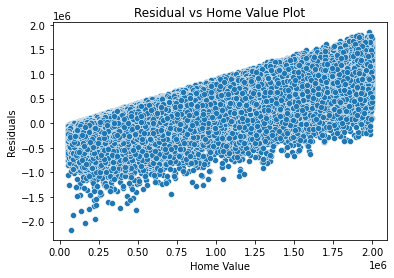

In [54]:
#make scatterplot of y-value vs residuals
sns.scatterplot(data=train, x='tax_appraisal', y='residuals')

plt.xlabel('Home Value')
plt.ylabel('Residuals')
plt.title('Residual vs Home Value Plot')
plt.show()

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [90]:
target = train.tax_appraisal

#### MSE - mean squared error

In [75]:
MSE = mean_squared_error(target, train.yhat)
MSE

65351903841.060165

#### SSE - sum of squared errors

In [57]:
SSE = MSE * len(train)
SSE

7.896163387167246e+16

#### ESS - explained sum of squares

In [77]:
ESS = ((train.yhat - target.mean())**2).sum()
ESS

4.091107008871126e+16

#### TSS - total sum of squares

In [63]:
TSS = ESS + SSE
TSS

1.1987270396038373e+17

#### RMSE - root mean squared eror

In [58]:
RMSE = MSE**.5
RMSE

255640.1843237095

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average ```taxvaluedollarcnt``` amount).

In [81]:
train['baseline'] = train.tax_appraisal.mean()

In [82]:
train.head().T

,0,1,2,3,4
bedrooms,4,2,3,3,3
bathrooms,2.0,1.5,3.5,2.0,1.0
bath_to_bed_ratio,2.0,1.3333,0.8571,1.5,3.0
sqft,0.106025,0.059091,0.403594,0.144186,0.100106
yearbuilt,1956,1963,1985,1954,1942
age,61,54,32,63,75
tax_appraisal,288931,356000,1937246,225118,583024
tax_bill,3518.2,4173.04,19552.96,2948.83,7017.33
tax_percentage,0.0122,0.0117,0.0101,0.0131,0.012
fips,6037,6059,6059,6037,6037


#### MSE - mean squared error

In [91]:
MSE_baseline = mean_squared_error(target, train.baseline)
MSE_baseline

99211592241.31027

#### SSE - sum of squared errors

In [92]:
SSE_baseline = MSE_baseline * len(train)
SSE_baseline

1.1987270396033986e+17

#### RMSE - root mean squared eror

In [94]:
RMSE_baseline = MSE_baseline**.5
RMSE_baseline

314978.7171243642

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [113]:
def calc_regression_errors(df, target, yhat, baseline):
    """
    This Function Calculates the MSE, SSE, ESS, TSS and RMSE for the yhat and the baseline.
    Then compares the SSE of both and determines if the model performs better or worse than baseline.
    
    Imports Needed:
    from sklearn.metrics import mean_squared_error
    
    Arguments Taken:
    df = DataFrame
    target = what you are trying to predict
    yhat = X_predictions 
    baseline = baseline is the mean of the target
    """
    
    print('** yhat Errors:')

    MSE = mean_squared_error(target, train.yhat)
    print(f'          Mean Squared Error (MSE): {MSE}')
    
    SSE = MSE * len(train)
    print(f'       Sum of Squared Errors (SSE): {SSE}')
    
    ESS = ((train.yhat - target.mean())**2).sum()
    print(f'    Explained Sum of Squares (ESS): {ESS}')
    
    TSS = ESS + SSE
    print(f'        Total Sum of Squares (TSS): {TSS}')
    
    RMSE = MSE**.5
    print(f'Root Mesn of Squared Errors (RMSE): {RMSE}')
    
    print()
    R2 = ESS / TSS
    print(f'           Explained Variance (R2): {R2}')
    #from sklearn: r2_score(target, yhat)
    
    print()
    print('** Baseline Errors:')

    MSE_baseline = mean_squared_error(target, train.baseline)
    print(f'          Mean Squared Error (MSE): {MSE_baseline}')
    
    SSE_baseline = MSE_baseline * len(train)
    print(f'       Sum of Squared Errors (SSE): {SSE_baseline}')
    
    ESS_baseline = ((train.baseline - target.mean())**2).sum()
    print(f'    Explained Sum of Squares (ESS): {ESS_baseline}')
    
    TSS_baseline = ESS_baseline + SSE_baseline
    print(f'        Total Sum of Squares (TSS): {TSS_baseline}')
    
    RMSE_baseline = MSE_baseline**.5
    print(f'Root Mean of Squared Errors (RMSE): {RMSE_baseline}')
    
    print()
    print('** Model Performance:')
    if SSE < SSE_baseline:
        print('Model performs better than baseline.')

    else:
        print('Model performs worse than baseline.')

In [114]:
target = train.tax_appraisal
calc_regression_errors(train, target, 'yhat', 'baseline')

** yhat Errors:
          Mean Squared Error (MSE): 65351903841.060165
       Sum of Squared Errors (SSE): 7.896163387167246e+16
    Explained Sum of Squares (ESS): 4.091107008871126e+16
        Total Sum of Squares (TSS): 1.1987270396038373e+17
Root Mesn of Squared Errors (RMSE): 255640.1843237095

           Explained Variance (R2): 0.3412876220947832

** Baseline Errors:
          Mean Squared Error (MSE): 99211592241.31027
       Sum of Squared Errors (SSE): 1.1987270396033986e+17
    Explained Sum of Squares (ESS): 0.0
        Total Sum of Squares (TSS): 1.1987270396033986e+17
Root Mean of Squared Errors (RMSE): 314978.7171243642

** Model Performance:
Model performs better than baseline.


### 7. What is the amount of variance explained in your model?

In [99]:
#manually
R2 = ESS / TSS
R2

0.3412876220947832

In [101]:
#from sklearn
r2_score(train.tax_appraisal, train.yhat)

0.3412876220945421

### 8. Is your model better than the baseline model?

* **Model Performance**:
Model performs better than baseline.

### 9. Create a file named ```evaluate.py``` that contains the following functions.
* ```plot_residuals(y, yhat)```: creates a residual plot
* ```regression_errors(y, yhat)```: returns the following values:
    * sum of squared errors (SSE)
    * explained sum of squares (ESS)
    * total sum of squares (TSS)
    * mean squared error (MSE)
    * root mean squared error (RMSE)
* ```baseline_mean_errors(y)```: computes the SSE, MSE, and RMSE for the baseline model
* ```better_than_baseline(y, yhat)```: returns true if your model performs better than the baseline, otherwise false

### plot_residuals

In [ ]:
def plot_residuals(df, y_train, X_train, model):
    """
    Creates a residual plot
    """
    residuals = y_train - model.predict(X_train)
    
    sns.scatterplot(data=df, x=y_train, y=residuals)

    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')
    plt.show()

### regression_errors
* ```calc_mdl_errors(df, target, yhat, baseline)``` does this

### baseline_mean_errors
* ```calc_mdl_errors(df, target, yhat, baseline)``` does this

### better_than_baseline
    * ```calc_mdl_errors(df, target, yhat, baseline)``` does this

# Bonus Exercises

### 1. Load the tips dataset from either pydataset or seaborn. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

### 2. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.